# Waze User Churn Prediction Case Study

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("waze_dataset.csv")
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [4]:
data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [5]:
#exploring our target. since we want to know the kilometer a car can cover
data['driven_km_drives'].describe()

count    14999.000000
mean      4039.340921
std       2502.149334
min         60.441250
25%       2212.600607
50%       3493.858085
75%       5289.861262
max      21183.401890
Name: driven_km_drives, dtype: float64

In [6]:
# check for missing data
data.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [7]:
# check for duplicates in our dataset
data.duplicated().sum()

0

In [9]:
data.nunique()

ID                         14999
label                          2
sessions                     469
drives                       401
total_sessions             14999
n_days_after_onboarding     3441
total_navigations_fav1       730
total_navigations_fav2       287
driven_km_drives           14999
duration_minutes_drives    14999
activity_days                 32
driving_days                  31
device                         2
dtype: int64

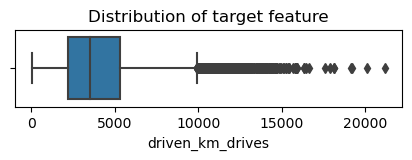

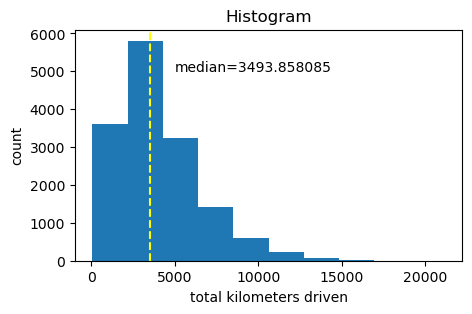

In [14]:

plt.figure(figsize=(5,1))
g = sns.boxplot(data=data, x='driven_km_drives')
plt.title("Distribution of target feature")
plt.show()

plt.figure(figsize=(5,3))
plt.hist(data["driven_km_drives"])
plt.xlabel('total kilometers driven')
plt.ylabel('count')
plt.title("Histogram")
median = data["driven_km_drives"].median()
plt.axvline(median, color="yellow", linestyle="--")
plt.text(5000, 5000, 'median='+str(median), color="black")
plt.show()

In [15]:
# let's see the label distribution since we have missing features there
data['label'].value_counts()

retained    11763
churned      2536
Name: label, dtype: int64

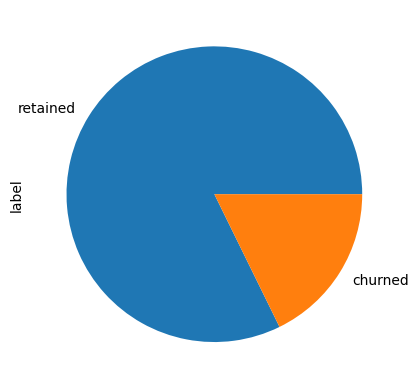

In [16]:
data['label'].value_counts().plot(kind='pie');

# Observations

- missing features in the label variable
- the presence of outliers can be observed in our target features

In [17]:
# Drop missing features
data.dropna(inplace=True)

In [18]:
data.isnull().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

In [26]:
# in cleaning our dataset we can also drop redundant dataset after checking for missing data and outliers, and duplicates

data.drop("ID", axis=1, inplace=True)

In [23]:
data.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


### Now the ID column has been droped 

In [33]:
# Segmenting Data (separating our input from our output dataset) by using the function 'pop' or any other
#y = data.pop('driven_km_drives')
# OR
y = data['driven_km_drives']
data.drop('driven_km_drives', axis=1, inplace=True)


In [32]:
# Encoding of categorical features to numerical ones
data = pd.get_dummies(data)
data

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,duration_minutes_drives,activity_days,driving_days,label_churned,label_retained,device_Android,device_iPhone
0,283,226,296.748273,2276,208,0,1985.775061,28,19,0,1,1,0
1,133,107,326.896596,1225,19,64,3160.472914,13,11,0,1,0,1
2,114,95,135.522926,2651,0,0,1610.735904,14,8,0,1,1,0
3,49,40,67.589221,15,322,7,587.196542,7,3,0,1,0,1
4,84,68,168.247020,1562,166,5,1219.555924,27,18,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,60,55,207.875622,140,317,0,2186.155708,25,17,0,1,0,1
14995,42,35,187.670313,2505,15,10,1208.583193,25,20,0,1,1,0
14996,273,219,422.017241,1873,17,0,1031.278706,18,17,0,1,0,1
14997,149,120,180.524184,3150,45,0,254.187763,6,6,1,0,0,1


In [34]:
# Normalizaiton of the dataset
# first we import the scaler object
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [35]:
# Instantiate the scaler object
scaler = RobustScaler()
df_scale = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df_scale

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,duration_minutes_drives,activity_days,driving_days,label_churned,label_retained,device_Android,device_iPhone
0,2.579545,2.438356,0.846378,0.301315,0.815476,-0.209302,0.311284,0.800000,0.500000,0.0,0.0,1.0,-1.0
1,0.875000,0.808219,1.031244,-0.299600,-0.309524,1.279070,1.033399,-0.200000,-0.071429,0.0,0.0,0.0,0.0
2,0.659091,0.643836,-0.142232,0.515723,-0.422619,-0.209302,0.080739,-0.133333,-0.285714,0.0,0.0,1.0,-1.0
3,-0.079545,-0.109589,-0.558792,-0.991424,1.494048,-0.046512,-0.548455,-0.600000,-0.642857,0.0,0.0,0.0,0.0
4,0.318182,0.273973,0.058427,-0.106918,0.565476,-0.093023,-0.159729,0.733333,0.428571,0.0,0.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14294,0.045455,0.095890,0.301424,-0.919954,1.464286,-0.209302,0.434463,0.600000,0.357143,0.0,0.0,0.0,0.0
14295,-0.159091,-0.178082,0.177528,0.432247,-0.333333,0.023256,-0.166474,0.600000,0.571429,0.0,0.0,1.0,-1.0
14296,2.465909,2.342466,1.614510,0.070898,-0.321429,-0.209302,-0.275467,0.133333,0.357143,0.0,0.0,0.0,0.0
14297,1.056818,0.986301,0.133709,0.801029,-0.154762,-0.209302,-0.753163,-0.666667,-0.428571,1.0,-1.0,0.0,0.0


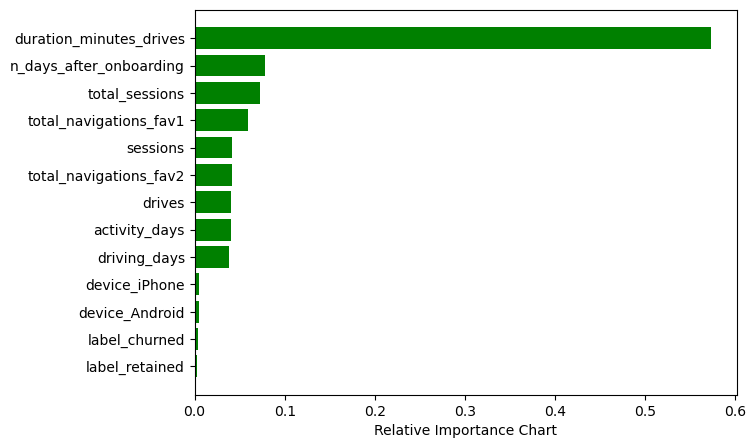

In [40]:
#initiating the RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor


feat_model = RandomForestRegressor()
feat_model.fit(df_scale,y)

feature_names = list(df_scale.columns)
importance = feat_model.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(7,5))
plt.barh(range(len(indices)), importance[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance Chart")
plt.show()

### Splitting our data into Training and Testing sets

In [43]:
# split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_scale,y,test_size=0.3, random_state=1)


In [44]:
x_train.shape, x_test.shape

((10009, 13), (4290, 13))

# Model Building

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
# Instatiate the models created. first create a variable for them

lin_reg = LinearRegression()
dec_tree = DecisionTreeRegressor()
gboost_mod = GradientBoostingRegressor()


In [47]:
# Fit the models and train the models with our training dataset
lin_reg.fit(x_train,y_train)
dec_tree.fit(x_train,y_train)
gboost_mod.fit(x_train,y_train)

GradientBoostingRegressor()

In [48]:
# creating prediction files for our models
lin_pred = lin_reg.predict(x_test)
dec_pred = dec_tree.predict(x_test)
gboost_pred = gboost_mod.predict(x_test)

In [49]:
gboost_pred

array([2793.67781682, 2901.19505912, 4107.04395781, ..., 3432.94392159,
       4363.49278719, 7074.76323126])

# Phase 3
- Model evaluation and interpretation
- metrics to use for classification problems, regression

Evaluation metrics= confusion matrix, MSE, MAE, RSME, r2_score, classification report

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Evaluate models using the validation dataset for the LinearRegression model
mse = mean_squared_error(y_test, lin_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lin_pred)

print(f"for the Logistic regression model r2 score {r2}")
print(f"for the Logistic regression model mse score {mse}")
print(f"for the Logistic regression model rmse score {rmse}")



for the Logistic regression model r2 score 0.46673180207800025
for the Logistic regression model mse score 3383409.9238340505
for the Logistic regression model rmse score 1839.4047743316453


In [52]:
# Evaluate models using the validation dataset for DecisionTreeRegressor model
mse = mean_squared_error(y_test, dec_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dec_pred)

print(f"for the Logistic regression model r2 score {r2}")
print(f"for the Logistic regression model mse score {mse}")
print(f"for the Logistic regression model rmse score {rmse}")


for the Logistic regression model r2 score -0.15537773810218058
for the Logistic regression model mse score 7330488.711129997
for the Logistic regression model rmse score 2707.487527419101


In [53]:
# Evaluate models using the validation dataset for GradientBoostingRegressor model
mse = mean_squared_error(y_test, gboost_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, gboost_pred)

print(f"for the Logistic regression model r2 score {r2}")
print(f"for the Logistic regression model mse score {mse}")
print(f"for the Logistic regression model rmse score {rmse}")

for the Logistic regression model r2 score 0.4586723300608363
for the Logistic regression model mse score 3434544.601862842
for the Logistic regression model rmse score 1853.2524387850788


<Axes: title={'center': 'Modal Coefficeints'}>

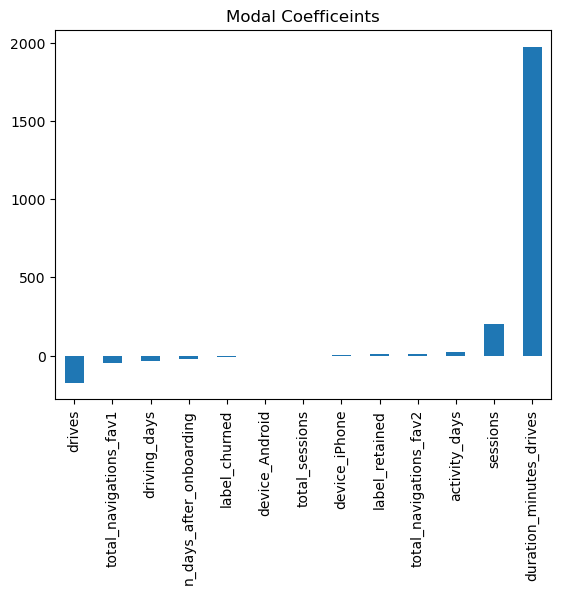

In [58]:
# Visualizing model coefficients
from pandas import Series
predictors = x_train.columns
coef = Series(lin_reg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficeints')

## Phase 4
Hyperparameter Optimization and productionizing our model
- hyperparameter opt. is the art and science of improving our model's performances. Think of hyperparameter opt as some configurations, or settings you can implement or tweak that can improve your model's performance. 
- this is the last stage of the machine learning pipeline, and the main aim here points to how the users use the model. there are alot of ways an ML model can be used. 

-- it can be embedded into an application to be used by users online via an API on web interfaces or on mobile devices it can be used to create reports or dashboards that will be used by the organization in making key business decisions it can be consumed via streaming or batch method 

#### in this case scenario, we will simulate the use of the model on a new dataset and use it to make relevant predictions

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use Gradient Boosting Algorithm
alg = gboost_mod

#Try these Hyperparameter values
params = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimator': [50, 100, 150]}

# Find the best hyperparameter combination to optimize the R2 metric
socre = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(x_train, y_train)
print("Best Parameter combination:", gridsearch.best_params_, "\n)")


# Measuring performance on the test set
print("Applying best model on the test data:")
best_mod = gridsearch.best_estimator_
pred = best_mod.predict(x_test)

NameError: name 'score' is not defined

In [63]:
# Evaluate models using the test data and isntantiating our hyperparemter estimations
mse = mean_squared_error(y_test, gboost_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, gboost_pred)

print(f"for the Logistic regression model r2 score {r2}")
print(f"for the Logistic regression model mse score {mse}")
print(f"for the Logistic regression model rmse score {rmse}")

for the Logistic regression model r2 score 0.4586723300608363
for the Logistic regression model mse score 3434544.601862842
for the Logistic regression model rmse score 1853.2524387850788


In [64]:
# To productionalize your model
import joblib
filename = './best_model.pkl'

joblib.dump(lin_reg, filename)

['./best_model.pkl']